In [2]:
import packages.cw_pb2 as CDP
import matplotlib.pyplot as plt
type_to_color = {
  0:"#ff8080a0",
  1:"#aa0087a0",
  2:"#ff0066a0",
  3:'#803dc1a0',
  4:'#000000a0'
}

In [3]:
def DisplayPacking(packing: CDP.Packing, save_to):
    stretching_factor = 1.0/(2*1.41*packing.dimensions)
    fig, ax = plt.subplots(figsize=(30, 30), facecolor='white')
    ax.set_axis_off()
    for disk in packing.disks:
        color = type_to_color[disk.size_type]
        ax.add_patch(plt.Circle((0.5 + disk.x * stretching_factor, 0.5 + disk.y * stretching_factor), stretching_factor * disk.radius, color=color))
    plt.savefig(save_to)
    plt.show()
def LoadPacking(packing_file: str)->CDP.Packing:
    packing = CDP.Packing()
    try:
        with open(packing_file, "rb") as f:
            packing.ParseFromString(f.read())
    except IOError:
        print(packing_file + ": Could not open file.  Creating a new one.")
    return packing

    

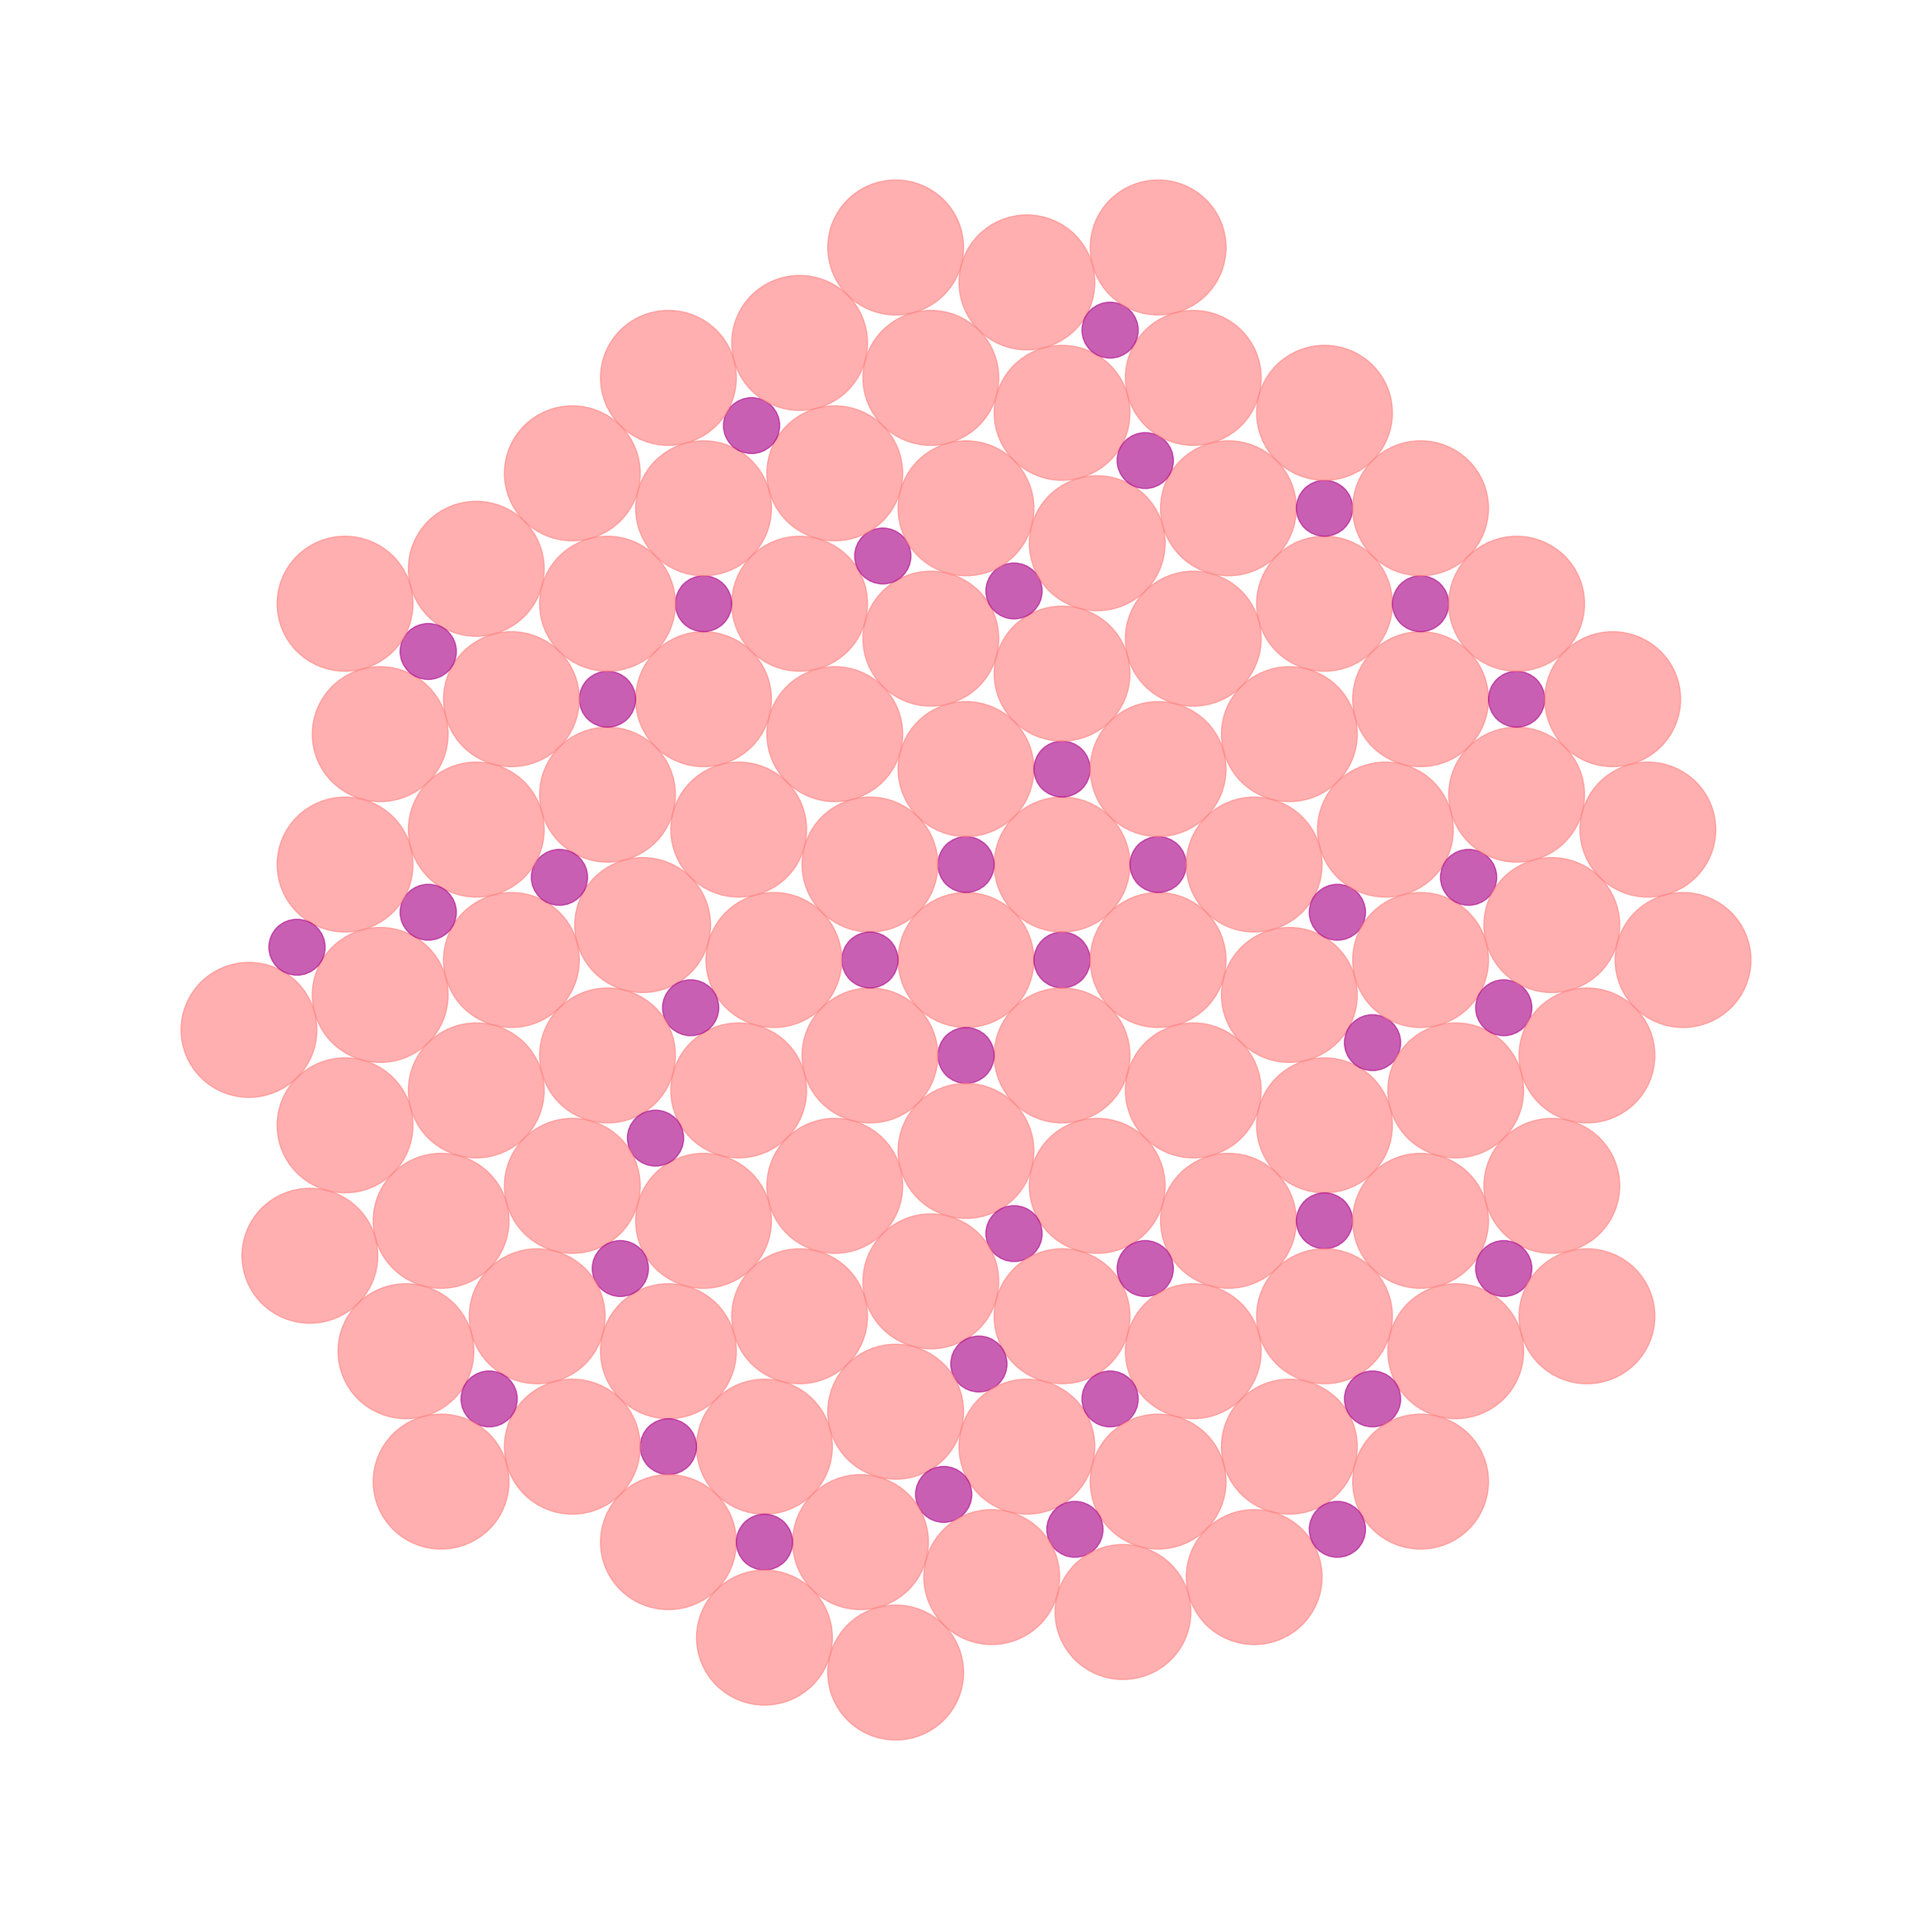

In [4]:
# for i in range(1, 10):
#     packing = LoadPacking(packing_file = "../storage/" + str(i) + ".txt")
#     DisplayPacking(packing, "disks.png")
#     # print(packing)

packing = LoadPacking(packing_file = "../storage/0.txt")
DisplayPacking(packing, "./images/16.png")
